<a href="https://colab.research.google.com/github/clovestad/Prediction_of_Product_Sales/blob/main/sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of Product Sales
  Colin Lovestad

##Project overview
  -sales prediction for food items sold at various stores.
##Load and Inspect Data

In [1]:
# import data and define the dataframe filepath
import pandas as pd
fpath=('/content/drive/MyDrive/StudentFolders16wk20wk/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv')
# read in data
df= pd.read_csv(fpath)


In [2]:
#preview first 5 rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#preview last 5 rows
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [4]:
#display sumary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##Clean Data
- 1) How many rows and columns?

In [5]:
#col/row count simplified, avaliable in info() as well
df.shape

(8523, 12)

- Rows - 8523
- Columns - 12

- 2) What are the datatypes of each variable?

In [6]:
#data type check simplified, also avaliable on info() as well
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- 3) Are there duplicates? If so, drop any duplicates.

In [7]:
duplicates= df.duplicated(keep= False)
duplicates.sum()

0

  - No duplicate entries


-  4) Identify missing values

In [8]:
## Get the number of null values for all columns and save as a variable
all_4_none=df.isna().sum()
all_4_none

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
null_percent= all_4_none/len(df)*100
null_percent

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

- OR use  missingno for visual representation

<Axes: >

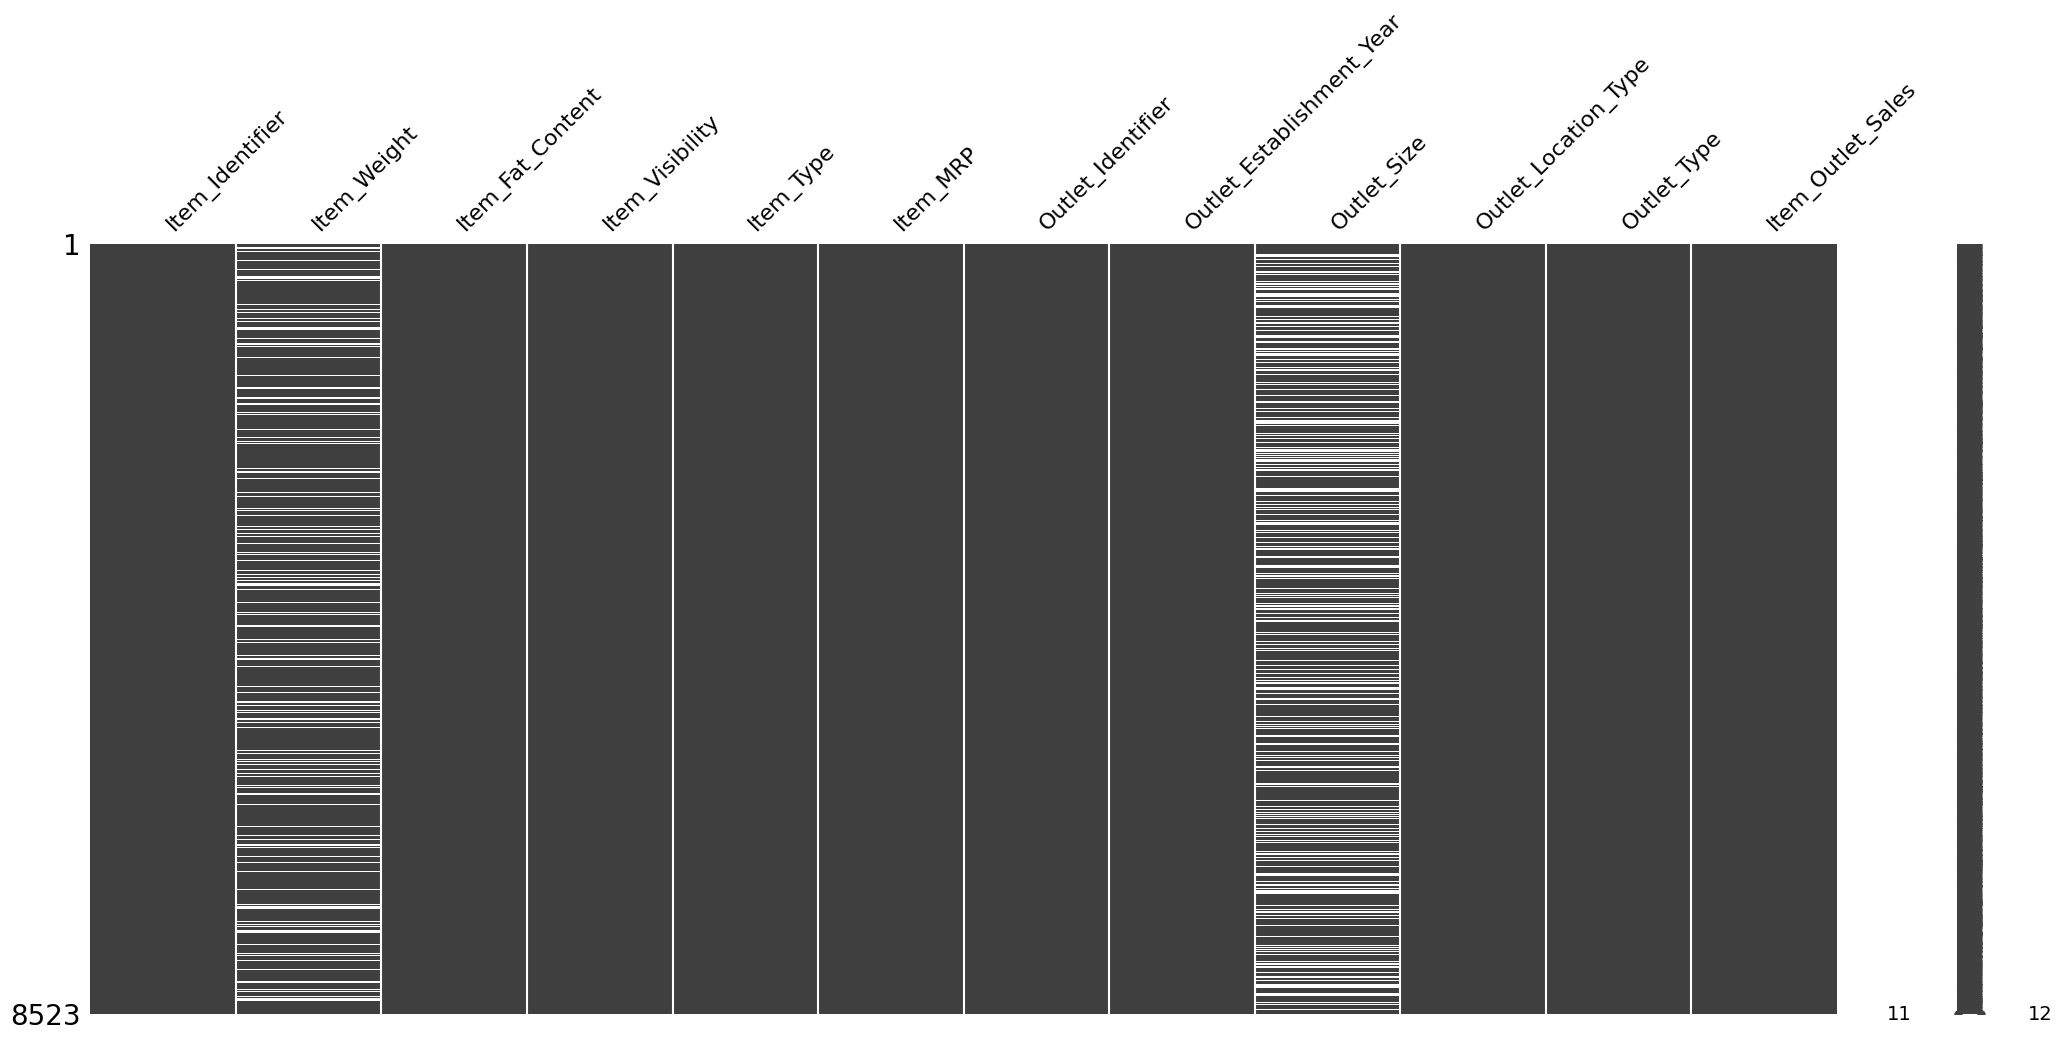

In [10]:
# Visualize the missing values using the missingno package's matrix plot.
import missingno as msno
msno.matrix(df)

- address missing values with  placeholders
- identify dtypes for appropriate  placeholder selection

In [11]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- weight dtype = int
- outlet size dtype = object

In [12]:
df['Item_Weight']= df['Item_Weight'].fillna(-1)

In [13]:
df['Outlet_Size']=df['Outlet_Size'].fillna('MISSING')

- Confirm missing data has been replaced with placevalues

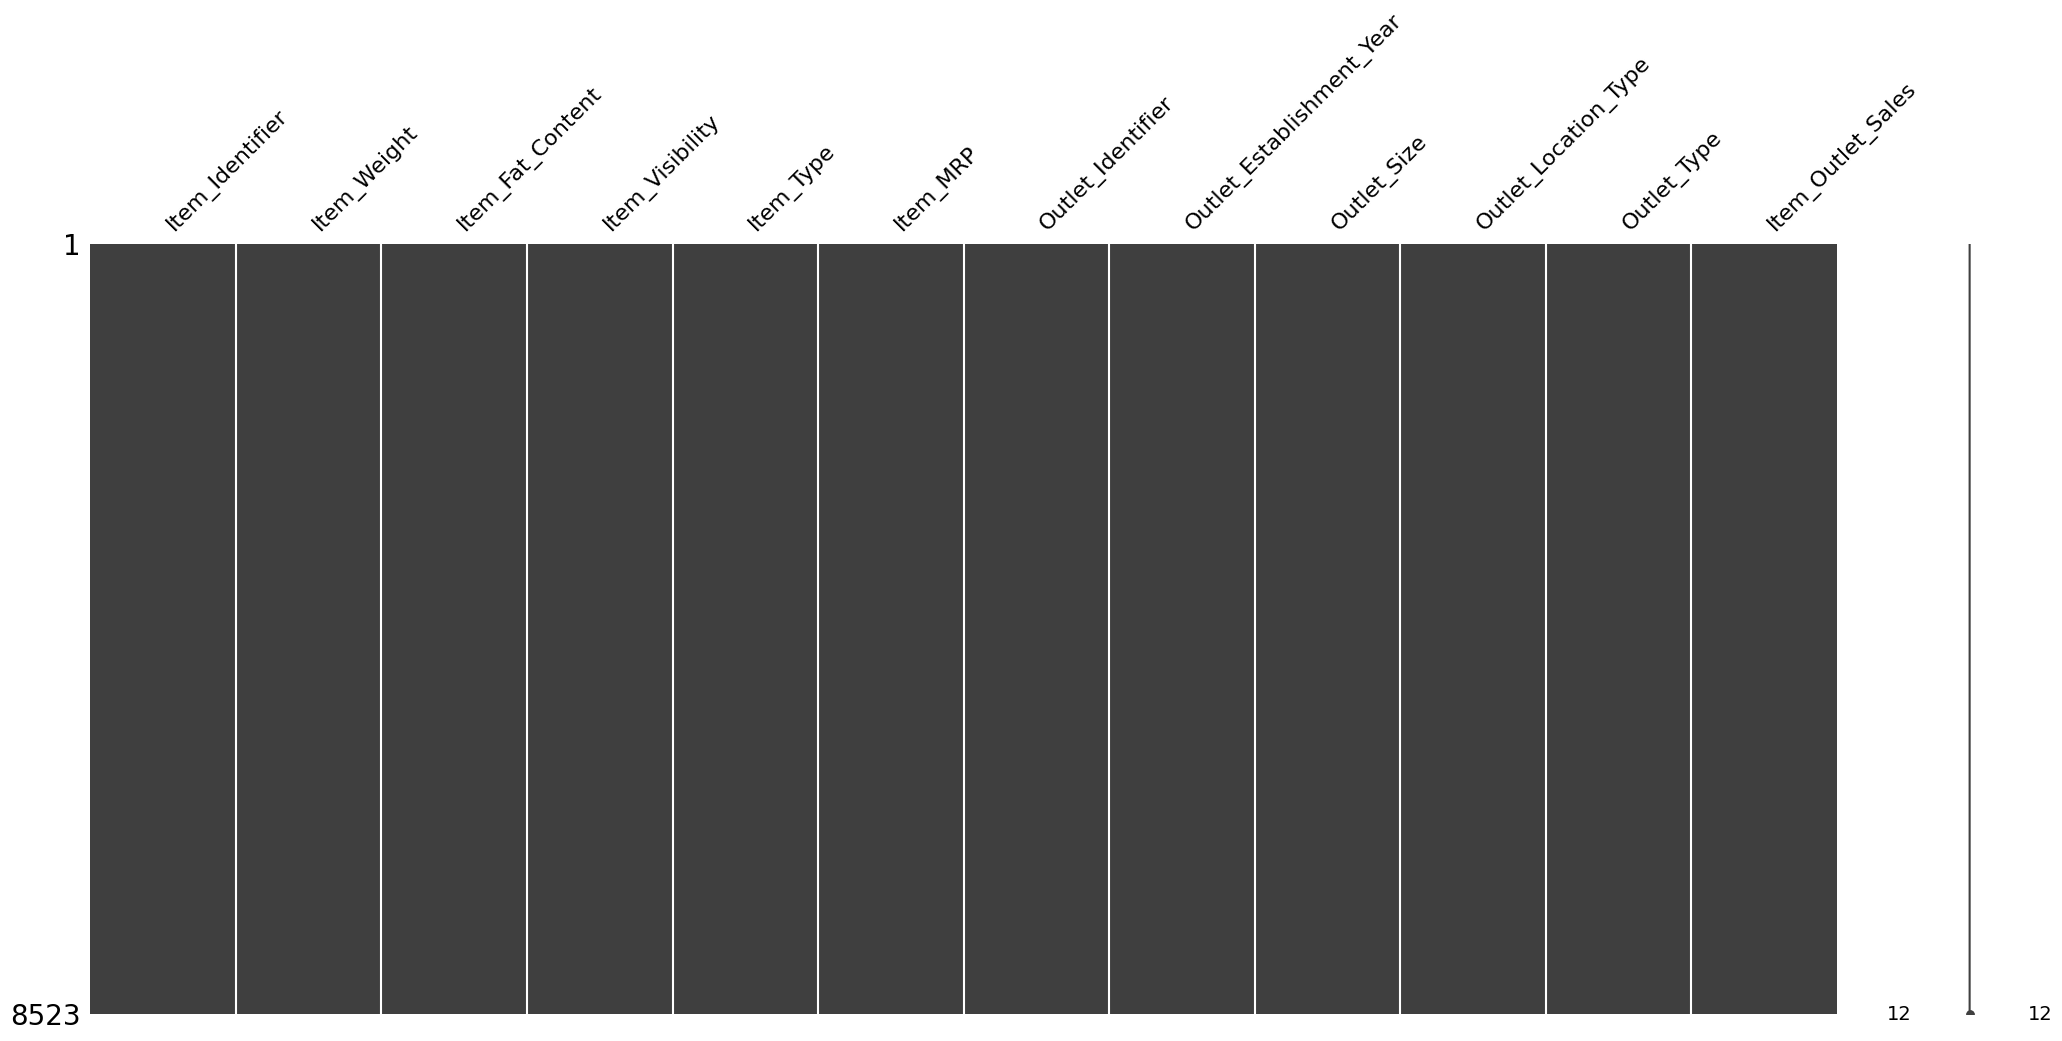

In [14]:
#already imported missingno above no need to import again
msno.matrix(df);

- Checking for inconsistient values

In [15]:
# Save a list of object columns (Hint: select_dtypes)
string_cols= df.select_dtypes('object').columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [16]:
# Check the nunique for just the object cols
string_cols.nunique()

7

- Display the value counts for the column
- Take a note of any values that are not consistent.


In [17]:
# loop through the list of string columnsas defined in variable above
for col in string_cols:
  # print the value counts for the column
  print(f'Value counts for  {col}')
  print(df[col].value_counts())
  # Print an empty line for readability
  print('\n')

Value counts for  Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value counts for  Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value counts for  Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value counts for  Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    

- take note of repeat values or key values
- incosistent values present in 'Item_Fat_Content' column


- isolate  values in question(for the purpose of clarity while renaming,same data is present in sting_col loop above)

In [18]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

- replace LF & low fat with - Low Fat
- replace reg  with - Regular

In [19]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':"Low Fat",'low fat':"Low Fat", 'reg':"Regular"})

- verify values have been updated

In [20]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

- Repeat process for numerical .dtypes

In [21]:
# identify all numerical columns
num_cols= df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [22]:
num_cols.nunique()

5

In [23]:
for col in num_cols:

  print(f'Value counts for  {col}')
  print(df[col].value_counts())
  # Print an empty line for readability
  print('\n')

Value counts for  Item_Weight
-1.000     1463
 12.150      86
 17.600      82
 13.650      77
 11.800      76
           ... 
 7.275        2
 7.685        1
 9.420        1
 6.520        1
 5.400        1
Name: Item_Weight, Length: 416, dtype: int64


Value counts for  Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64


Value counts for  Item_MRP
172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64


Value counts for  Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


Value counts for  Item_Outlet_Sales
958.7520     1

- no inconsistentcies noted
-  For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [24]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##Exploratory Data Analysis

- complete statistical analyses  through various graphs and plotting techniques to better understand the dataframe.

-import all libraries

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

##numerical features

- view distributions among applicable numerical columns

In [26]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [27]:
# list all numeric columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

- item outlet sales and item MRP are most applicable to undersatanding  data relating to increasing sales

Text(0.5, 1.0, 'distribution of item MRP')

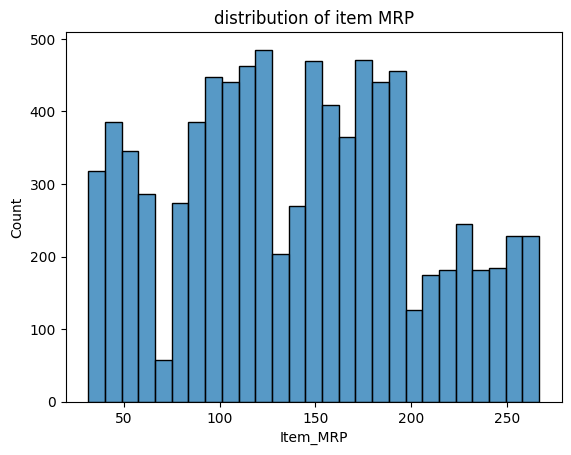

In [28]:
ax= sns.histplot(data=df, x='Item_MRP')
ax.set_title('distribution of item MRP')

Text(0.5, 1.0, 'distribution of Item_Outlet_Sales')

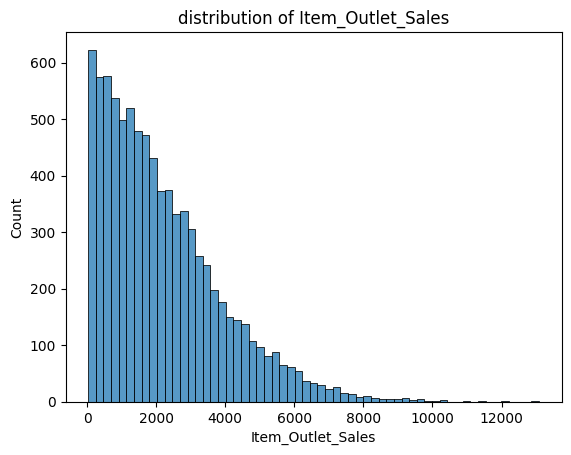

In [29]:
ax= sns.histplot(data=df, x='Item_Outlet_Sales')
ax.set_title('distribution of Item_Outlet_Sales')

- create boxplots for staistical summaries of the applicable numerical columns

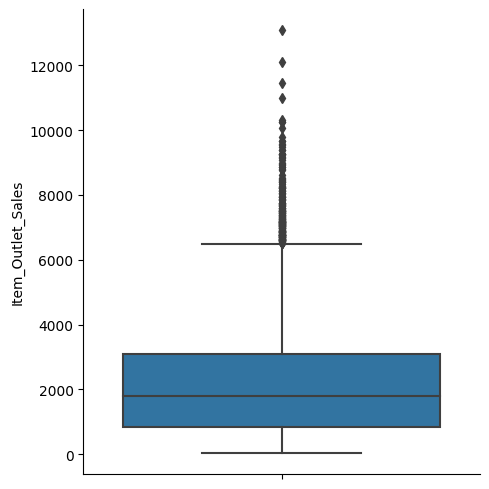

In [35]:
g= sns.catplot(data=df, y='Item_Outlet_Sales', kind="box", )

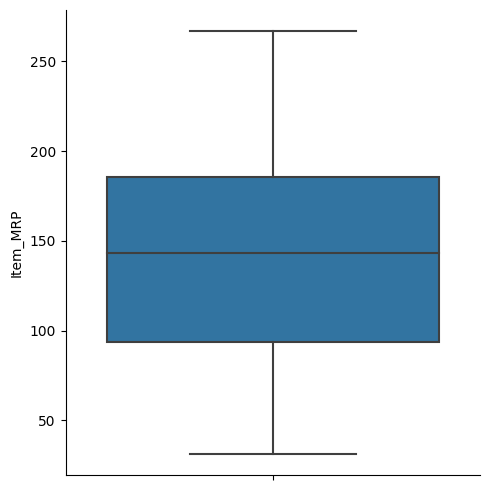

In [33]:
g= sns.catplot(data=df, y='Item_MRP', kind="box", )

- identify all  categorical columns

In [48]:
#variable previously defined in cleaning
string_cols


Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

- item type has the only direct correlation with the sale items.


In [51]:
# view value counts and save varible
val_counts= df['Item_Type'].value_counts()
val_counts

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

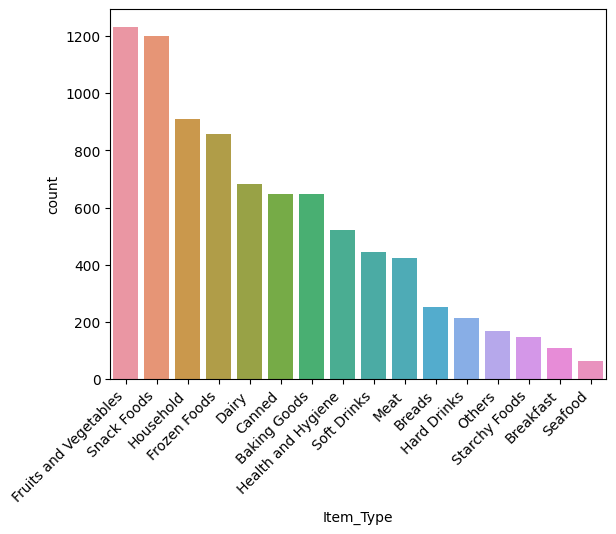

In [52]:
#use a countplot to visualize the most common items
val_counts= df['Item_Type'].value_counts()
ax= sns.countplot(data=df, x='Item_Type', order= val_counts.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


- Use heatmap to visualize correlations

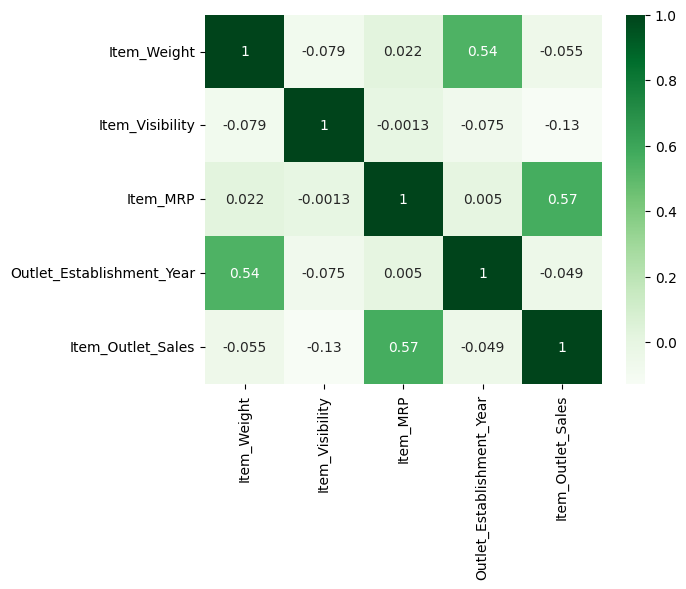

In [58]:
corr= df.corr(numeric_only=True)
ax= sns.heatmap(corr,cmap='Greens',annot=True)

##Explanatory Data Analysis